Installing and importing `uproot`.

In [3]:
# !pip install uproot
# !pip install hist
# !pip install mplhep

import uproot
import matplotlib.pyplot as plt
import numpy as np

Extracting `.root` file.

In [8]:
f = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root")
#f = uproot.open("http://opendata.atlas.cern/release/samples/MC/mc_105987.WZ.root")

Extracting file '`mini`' directly, printing all filenames.

In [17]:
dat = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root:mini")
#dat = uproot.open("http://opendata.atlas.cern/release/samples/MC/mc_105987.WZ.root:mini")
dat.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
runNumber            | int32_t                  | AsDtype('>i4')
eventNumber          | int32_t                  | AsDtype('>i4')
channelNumber        | int32_t                  | AsDtype('>i4')
mcWeight             | float                    | AsDtype('>f4')
scaleFactor_PILEUP   | float                    | AsDtype('>f4')
scaleFactor_ELE      | float                    | AsDtype('>f4')
scaleFactor_MUON     | float                    | AsDtype('>f4')
scaleFactor_PHOTON   | float                    | AsDtype('>f4')
scaleFactor_TAU      | float                    | AsDtype('>f4')
scaleFactor_BTAG     | float                    | AsDtype('>f4')
scaleFactor_LepTR... | float                    | AsDtype('>f4')
scaleFactor_Photo... | float                    | AsDtype('>f4')
trigE                | bool                     | AsDtype(

Initial histogram

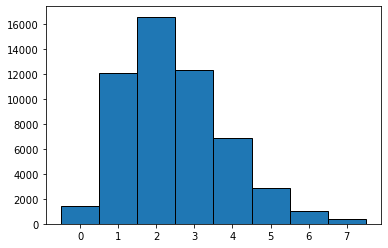

In [32]:
#dat = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_A.4lep.root:mini")
dat = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root:mini")

jet_n = dat["jet_n"].array(library="np")

binpos = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
plt.hist(jet_n, bins = binpos, edgecolor = 'black')
plt.show()

**Fully working histogram - !! DO NOT DELETE !!**

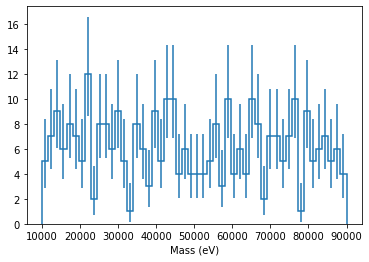

In [4]:
import hist
from hist import Hist
import mplhep

dat = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root:mini")
sel = dat.arrays(["lep_pt", "lep_E","lep_charge", "lep_type", "lep_n"])

hist1 = Hist(hist.axis.Regular(50, 1e+04, 9e+04, label = "Mass (eV)"))

for i in range(1000): # Runs best with 1,000 datapoints
    
    lep_n = sel["lep_n"][i]
    # Cut 1: At least 2 leptons
    if lep_n >= 2:
        
        
        lep_charge = sel["lep_charge"][i]
        # Cut 2: Leptons w/ opposite charge
        if lep_charge[0] != lep_charge[1]:
        #if (lep_charge[0][0] != lep_charge[0][1]):
            
            lep_type = sel["lep_type"][i]
            # Cut 3: Leptons of same family
            if lep_type[0] == lep_type[1]:
                
                en1 = sel["lep_E"][i][0]
                en2 = sel["lep_E"][i][1]
                
                hist1.fill(en1)
                hist1.fill(en2)

hist1.plot()
#plt.xscale('log')

plt.show()

In [50]:
bin_norm = []
for i in range(49):
    bin_norm.append(hist1[i]/hist1.sum())

print(bin_norm)
#hist_norm[0] = hist1[0]/hist1.sum()

hist2 = Hist(hist.axis.Regular(50, 1e+04, 9e+04, name = "Mass (eV)"))
hist2.fill(en1/bin_norm)
hist2.fill(en2/bin_norm)

hist2.plot()
plt.show()

[0.016129032258064516, 0.02258064516129032, 0.02903225806451613, 0.01935483870967742, 0.025806451612903226, 0.02258064516129032, 0.016129032258064516, 0.03870967741935484, 0.0064516129032258064, 0.025806451612903226, 0.025806451612903226, 0.01935483870967742, 0.02903225806451613, 0.016129032258064516, 0.0032258064516129032, 0.025806451612903226, 0.01935483870967742, 0.00967741935483871, 0.02903225806451613, 0.016129032258064516, 0.03225806451612903, 0.03225806451612903, 0.012903225806451613, 0.01935483870967742, 0.012903225806451613, 0.012903225806451613, 0.012903225806451613, 0.016129032258064516, 0.025806451612903226, 0.00967741935483871, 0.03225806451612903, 0.012903225806451613, 0.01935483870967742, 0.012903225806451613, 0.03225806451612903, 0.025806451612903226, 0.0064516129032258064, 0.02258064516129032, 0.02258064516129032, 0.016129032258064516, 0.02258064516129032, 0.03225806451612903, 0.0032258064516129032, 0.02903225806451613, 0.016129032258064516, 0.01935483870967742, 0.0225

TypeError: unsupported operand type(s) for /: 'float' and 'list'

**!! WORKING SO FAR !! - need to remove error bars**

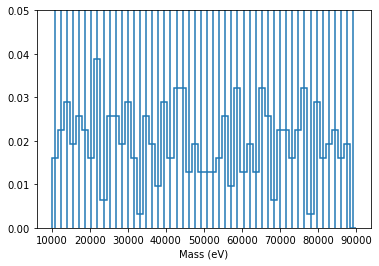

1.0


In [7]:
arr1 = hist1.values() # Returns bin values
arr2 = arr1/arr1.sum() # Divides bin values by sum of bin values

hist2 = Hist(hist.axis.Regular(50, 1e+04, 9e+04, label = "Mass (eV)"))

hist2[0:49] = arr2[0:49] # Assigns normalised bin values to original bin values
hist2.plot()
plt.ylim(0,0.05) # Brings y-limit closer to highest peak, making histogram bars more visible
plt.show()

print(arr2.sum()) # Gives 1.0, so normalisation worked!

# hist2.view()

Attempt #1 to normalise histogram - scaled down x-axis instead of y-axis, so **unsuccessful**.

529270.0625
721
734.0777565880721


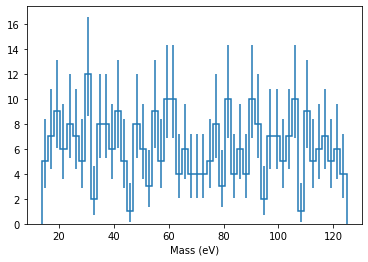

In [38]:
import hist
from hist import Hist
import mplhep

##### ALL 4 LEP, SAME OTHER STATS
# 4lep data A - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_A.4lep.root
# 4lep data B - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_B.4lep.root
# 4lep data C - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_C.4lep.root
# 4lep data D - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_D.4lep.root

##### NO LEP
# 2photons data A - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/Data/data_A.GamGam.root


# 4lep MC - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/MC/mc_361106.Zee.4lep.root

# 3lep data A - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/3lep/Data/data_A.3lep.root

# 2lep MC - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root
# 2lep MC - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_345445.ZH125J_vvWW2lep.2lep.root

# 3lep MC - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/3lep/MC/mc_301216.ZPrime3000_ee.3lep.root

# 4lep data - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_A.4lep.root:mini


#f = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_A.4lep.root")
#f.keys()

#dat = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_345445.ZH125J_vvWW2lep.2lep.root:mini")
#dat = uproot.lazy("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_345445.ZH125J_vvWW2lep.2lep.root:mini")
dat = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root:mini")

#sel = dat.arrays(["lep_pt", "lep_eta", "lep_phi", "lep_E","lep_charge", "lep_type", "lep_n"])
sel = dat.arrays(["lep_pt", "lep_E","lep_charge", "lep_type", "lep_n", "eventNumber"])

#hist = Hist(hist.axis.Regular(50, 0, 50, name = "Mass (eV)"))

hist1 = Hist(hist.axis.Regular(50, 1e+04, 9e+04, name = "Mass (eV)")) #<-  shows 2 peaks

size = len(sel["lep_pt"]) # Value of 53653
nrg = len(sel["lep_E"]) # Same value as size
#print(nrg)

E1 = []
E2 = []

for i in range(1000): # Runs best with 1,000 datapoints
    
    lep_n = sel["lep_n"][i]
    # Cut 1: At least 2 leptons
    if lep_n >= 2:
        
        
        lep_charge = sel["lep_charge"][i]
        # Cut 2: Leptons w/ opposite charge
        if lep_charge[0] != lep_charge[1]:
        #if (lep_charge[0][0] != lep_charge[0][1]):
            
            lep_type = sel["lep_type"][i]
            # Cut 3: Leptons of same family
            if lep_type[0] == lep_type[1]:
                
                en1 = sel["lep_E"][i][0]
                en2 = sel["lep_E"][i][1]
                
                #hist1.fill(en1)
                #hist1.fill(en2)
                
                E1.append(en1)
                E2.append(en2)
                
                #num = sel["eventNumber",i]
                #print("Event number:", num)

#scale = hist1.Integral()
#hist1.Scale(1/scale)

normE1 = []
for a in E1:
    normE1.append(a/len(E1))

normE2 = []
for b in E2:
    normE2.append(b/len(E2))

hist1 = Hist(hist.axis.Regular(50, (1e+04)/len(E1), (9e+04)/len(E1), name = "Mass (eV)"))

hist1.fill(normE1)
hist1.fill(normE2)

# Area under histogram should be 1 - use len(size)?

#print(hist1.sum)

hist1.plot()
#plt.xscale('log')

print(E1[0])
print(len(E1))
print(normE1[0])

plt.show()

In [42]:
bin_norm = []
for i in range(49):
    bin_norm.append(hist1[i]/hist1.sum())

print(bin_norm)
#hist_norm[0] = hist1[0]/hist1.sum()

hist2 = Hist(hist.axis.Regular(bins = bin_norm, 1e+04, 9e+04, name = "Mass (eV)")
hist2.fill()


[0.016129032258064516, 0.02258064516129032, 0.02903225806451613, 0.01935483870967742, 0.025806451612903226, 0.02258064516129032, 0.016129032258064516, 0.03870967741935484, 0.0064516129032258064, 0.025806451612903226, 0.025806451612903226, 0.01935483870967742, 0.02903225806451613, 0.016129032258064516, 0.0032258064516129032, 0.025806451612903226, 0.01935483870967742, 0.00967741935483871, 0.02903225806451613, 0.016129032258064516, 0.03225806451612903, 0.03225806451612903, 0.012903225806451613, 0.01935483870967742, 0.012903225806451613, 0.012903225806451613, 0.012903225806451613, 0.016129032258064516, 0.025806451612903226, 0.00967741935483871, 0.03225806451612903, 0.012903225806451613, 0.01935483870967742, 0.012903225806451613, 0.03225806451612903, 0.025806451612903226, 0.0064516129032258064, 0.02258064516129032, 0.02258064516129032, 0.016129032258064516, 0.02258064516129032, 0.03225806451612903, 0.0032258064516129032, 0.02903225806451613, 0.016129032258064516, 0.01935483870967742, 0.0225

Attempt #2 to normalise histogram - **unsuccessful**.

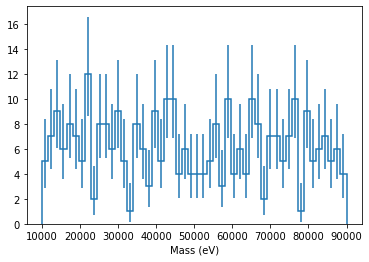

Unnormalised bin data:

[5.0, 7.0, 9.0, 6.0, 8.0, 7.0, 5.0, 12.0, 2.0, 8.0, 8.0, 6.0, 9.0, 5.0, 1.0, 8.0, 6.0, 3.0, 9.0, 5.0, 10.0, 10.0, 4.0, 6.0, 4.0, 4.0, 4.0, 5.0, 8.0, 3.0, 10.0, 4.0, 6.0, 4.0, 10.0, 8.0, 2.0, 7.0, 7.0, 5.0, 7.0, 10.0, 1.0, 9.0, 5.0, 6.0, 7.0, 5.0, 6.0]

Sum of bin data: 306.0


TypeError: object of type 'float' has no len()

In [38]:
import hist
from hist import Hist
import mplhep

dat = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root:mini")
sel = dat.arrays(["lep_pt", "lep_E","lep_charge", "lep_type", "lep_n"])

hist1 = Hist(hist.axis.Regular(50, 1e+04, 9e+04, name = "Mass (eV)"))
# hist1 = hist.numpy.histogram(50,1e+04,9e+04, density = True)

for i in range(1000): # Runs best with 1,000 datapoints
    
    lep_n = sel["lep_n"][i]
    # Cut 1: At least 2 leptons
    if lep_n >= 2:
        
        
        lep_charge = sel["lep_charge"][i]
        # Cut 2: Leptons w/ opposite charge
        if lep_charge[0] != lep_charge[1]:
        #if (lep_charge[0][0] != lep_charge[0][1]):
            
            lep_type = sel["lep_type"][i]
            # Cut 3: Leptons of same family
            if lep_type[0] == lep_type[1]:
                
                en1 = sel["lep_E"][i][0]
                en2 = sel["lep_E"][i][1]
                
                hist1.fill(en1)
                hist1.fill(en2)



#hist1.plot()
# plt.xscale('log')

#plt.show()

#print(hist1[1])



'''
## 1st refill attempt - didn't work as got bin values instead of data

bsum = []
for i in range(49):
    bsum.append(hist1[i])

print("Unnormalised bin data:")
print("")
print(bsum)
print("")
tot = sum(bsum)
print("")

#bnorm = []
#for a in bnorm:
    #bnorm.append(a/tot)

#print(bnorm)

bnorm = [x / tot for x in bsum]

print("Normalised bin data:")
print("")
print(bnorm)

hist2 = Hist(hist.axis.Regular(50, 0, 5, name = "Mass (eV)"))
hist2.fill(bnorm)
hist2.plot()
plt.show()
'''




bsum = []
for i in range(49):
    bsum.append(hist1[i])

print("Unnormalised bin data:")
print("")
print(bsum)
print("")
tot = sum(bsum)
print("Sum of bin data:", tot)

#print("")
#print(en1)
#print(len(en1))


# en1norm = [x / tot for x in en1]
# en2norm = [x / tot for x in en2]


en1norm = []
for x in range(len(en1)):
    en1norm.append(en1[x]/tot)

en2norm = []
for y in range(len(en2)):
    en2norm.append(en2[y]/tot)



hist2 = Hist(hist.axis.Regular(50, 1e+04, 9e+04, name = "Mass (eV)"))
hist2.fill(en1norm)
hist2.fill(en2norm)
hist2.plot()
plt.show()




#normE1 = []
#for a in E1:
    #normE1.append(a/len(E1))



#bnorm = bsum/tot
#print(bnorm)

#normE1.append(a/len(E1))

#print(hist1[49])

# 1. Extract hist bin data - should be 50 long X
# 2. Find sum of data X
# 3. Divide histogram data by sum X
# 4. Fill new histogram

'''
## Getting bin info

print("Maximum of E1:", max(E1))
print("Minimum of E1:", min(E1))
print("")
dens = hist1.density()
print("Density array with length:")
print(dens)
print("Length:", len(dens))
print("")
vals = hist1.values()
print("Values array:")
print(vals)
print("Length:", len(vals))
print("Maximum:", max(vals))
print("")
counts = hist1.counts()
print("Counts array (same as values):")
print(counts)
print("Length:", len(counts))
print("Mean:", np.mean(counts))

hist1.axes[0]
'''

In [54]:
# 4lep MC - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/MC/mc_361106.Zee.4lep.root

# 3lep data A - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/3lep/Data/data_A.3lep.root

# 2lep MC - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root
# 2lep MC - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_345445.ZH125J_vvWW2lep.2lep.root

# 3lep MC - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/3lep/MC/mc_301216.ZPrime3000_ee.3lep.root

# 4lep data - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_A.4lep.root:mini

dat = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root:mini")
sel = dat.arrays(["lep_pt", "lep_eta", "lep_phi", "lep_E","lep_charge", "lep_type", "lep_n"])

for i in range(50):
    lep_n = sel["lep_n"][i]
    lep_charge = sel["lep_charge"][i]
    lep_type = sel["lep_type"][i]
    lep_E = sel["lep_E"][i]
    if lep_n >= 2:
        if lep_charge[0] != lep_charge[1]:
            if lep_type[0] == lep_type[1]:
                for j in lep_type:
                    for k in lep_E:
                        print(j)
                        print(k)

11
529270.0625
11
281577.65625
11
529270.0625
11
281577.65625
11
212054.484375
11
78942.265625
11
212054.484375
11
78942.265625
11
265711.375
11
9315.408203125
11
265711.375
11
9315.408203125
11
285745.8125
11
76898.0546875
11
285745.8125
11
76898.0546875
11
212725.265625
11
135773.3125
11
212725.265625
11
135773.3125
11
375410.96875
11
62907.48828125
11
375410.96875
11
62907.48828125
11
535970.3125
11
311379.34375
11
535970.3125
11
311379.34375
11
217587.03125
11
65412.61328125
11
217587.03125
11
65412.61328125
11
329171.59375
11
458205.84375
11
329171.59375
11
458205.84375
11
409039.96875
11
88295.2734375
11
409039.96875
11
88295.2734375
11
327251.75
11
128237.5703125
11
327251.75
11
128237.5703125
11
455566.46875
11
60856.64453125
11
455566.46875
11
60856.64453125
11
396194.75
11
161891.296875
11
396194.75
11
161891.296875
11
279353.875
11
62472.54296875
11
279353.875
11
62472.54296875
11
292072.84375
11
312442.875
11
292072.84375
11
312442.875
11
597331.9375
11
167350.703125
11
597